# Dashboard

1. Load model
2. Load data
3. Evaluate
4. Visualize DataFrame
5. 

In [1]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
import torch
from torch.utils.data import DataLoader
import torch.nn.functional as F
import pytorch_lightning as pl

from arnet.modeling.learner import Learner
from arnet.dataset import ActiveRegionDataModule, ActiveRegionDataset
from arnet import utils
from arnet.utils import plot

from mlflow_helper import retrieve, select, tensorboard
from dashboard_helper import get_learner, inspect_runs, predict, get_transform_from_learner

pd.set_option('display.max_colwidth', None)
%load_ext tensorboard
%load_ext autoreload
%autoreload 2

/home/zeyusun/work/flare-prediction-smarp/arnet/dataset.py:13: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  from arnet.transforms import get_transform


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [3]:
%matplotlib inline

## Compare CNN trained on `sharp` and `fused_sharp`

In [4]:
estimator = 'CNN'
target_layer = 'convs.conv4'

In [5]:
dfs = {dataset: predict(dataset, 0, estimator)
       for dataset in ['sharp', 'fused_sharp']}

# runs, dirs = inspect_runs(['sharp', 'fused_sharp'], 0, 'CNN')
# runs

# %tensorboard --logdir_spec {dirs}

# confusion_matrix(dfs['sharp']['test']['label'], dfs['sharp']['test']['pred'])

# confusion_matrix(dfs['fused_sharp']['test']['label'], dfs['fused_sharp']['test']['pred'])

Select iloc 0 from 
                         start_time tags.mlflow.runName  \
82 2021-06-27 16:03:33.239000+00:00            LSTM_CNN   

               tags.mlflow.source.git.commit  
82  e13810ffddafdb818df7c4de68d9eafd67861e8c  


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
Using native 16bit precision.


Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 64, 1, 4, 4]         --
|    └─Conv3d: 2-1                       [-1, 64, 1, 128, 128]     7,808
|    └─BatchNorm3d: 2-2                  [-1, 64, 1, 128, 128]     128
|    └─ReLU: 2-3                         [-1, 64, 1, 128, 128]     --
|    └─MaxPool3d: 2-4                    [-1, 64, 1, 64, 64]       --
|    └─Conv3d: 2-5                       [-1, 64, 1, 64, 64]       102,464
|    └─BatchNorm3d: 2-6                  [-1, 64, 1, 64, 64]       128
|    └─ReLU: 2-7                         [-1, 64, 1, 64, 64]       --
|    └─MaxPool3d: 2-8                    [-1, 64, 1, 32, 32]       --
|    └─Conv3d: 2-9                       [-1, 64, 1, 32, 32]       36,928
|    └─BatchNorm3d: 2-10                 [-1, 64, 1, 32, 32]       128
|    └─ReLU: 2-11                        [-1, 64, 1, 32, 32]       --
|    └─MaxPool3d: 2-12                   [-1, 64, 1, 16, 16]       --


/home/zeyusun/work/flare-prediction-smarp/arnet/dataset.py:158: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  self._construct_datasets(balanced=cfg.DATA.BALANCED)
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
Using native 16bit precision.


Select iloc 0 from 
                         start_time tags.mlflow.runName  \
82 2021-06-27 16:03:33.239000+00:00            LSTM_CNN   

               tags.mlflow.source.git.commit  
82  e13810ffddafdb818df7c4de68d9eafd67861e8c  
Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 64, 1, 4, 4]         --
|    └─Conv3d: 2-1                       [-1, 64, 1, 128, 128]     7,808
|    └─BatchNorm3d: 2-2                  [-1, 64, 1, 128, 128]     128
|    └─ReLU: 2-3                         [-1, 64, 1, 128, 128]     --
|    └─MaxPool3d: 2-4                    [-1, 64, 1, 64, 64]       --
|    └─Conv3d: 2-5                       [-1, 64, 1, 64, 64]       102,464
|    └─BatchNorm3d: 2-6                  [-1, 64, 1, 64, 64]       128
|    └─ReLU: 2-7                         [-1, 64, 1, 64, 64]       --
|    └─MaxPool3d: 2-8                    [-1, 64, 1, 32, 32]       --
|    └─Conv3d: 2-9                       [-1, 64, 1,

/home/zeyusun/work/flare-prediction-smarp/arnet/dataset.py:158: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  self._construct_datasets(balanced=cfg.DATA.BALANCED)
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

In [7]:
df_fn = dfs['sharp']['test'].loc[(
    dfs['sharp']['test']['label'] &
    ~dfs['sharp']['test']['pred'] &
    dfs['fused_sharp']['test']['pred']
).astype(bool)]
len(df_fn)

# df_fp = dfs['sharp']['test'].loc[(
#     ~dfs['sharp']['test']['label'] &
#     dfs['sharp']['test']['pred'] &
#     ~dfs['fused_sharp']['test']['pred']
# ).astype(bool)]
# len(df_fp)

58

What do we want to know for a FN?
The score, the thresh, the gradcam 0, the gradcam 1.

In [9]:
gradcam = {
    dataset: utils.GradCAM(get_learner(dataset, 0, estimator).model,
                           target_layers=[target_layer], data_mean=0, data_std=1)
    for dataset in ['sharp', 'fused_sharp']
}

Select iloc 0 from 
                         start_time tags.mlflow.runName  \
82 2021-06-27 16:03:33.239000+00:00            LSTM_CNN   

               tags.mlflow.source.git.commit  
82  e13810ffddafdb818df7c4de68d9eafd67861e8c  
Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 64, 1, 4, 4]         --
|    └─Conv3d: 2-1                       [-1, 64, 1, 128, 128]     7,808
|    └─BatchNorm3d: 2-2                  [-1, 64, 1, 128, 128]     128
|    └─ReLU: 2-3                         [-1, 64, 1, 128, 128]     --
|    └─MaxPool3d: 2-4                    [-1, 64, 1, 64, 64]       --
|    └─Conv3d: 2-5                       [-1, 64, 1, 64, 64]       102,464
|    └─BatchNorm3d: 2-6                  [-1, 64, 1, 64, 64]       128
|    └─ReLU: 2-7                         [-1, 64, 1, 64, 64]       --
|    └─MaxPool3d: 2-8                    [-1, 64, 1, 32, 32]       --
|    └─Conv3d: 2-9                       [-1, 64, 1,

In [10]:
learner = get_learner('sharp', 0, estimator) # only to get cfg to construct dataset. #'sharp' and 'fused_sharp' share the same test set. # estimator is not used here
transform = get_transform_from_learner(learner)
dset = ActiveRegionDataset(df_fn, features=['MAGNETOGRAM'], num_frames=1, transform=transform)

Select iloc 0 from 
                         start_time tags.mlflow.runName  \
82 2021-06-27 16:03:33.239000+00:00            LSTM_CNN   

               tags.mlflow.source.git.commit  
82  e13810ffddafdb818df7c4de68d9eafd67861e8c  
Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 64, 1, 4, 4]         --
|    └─Conv3d: 2-1                       [-1, 64, 1, 128, 128]     7,808
|    └─BatchNorm3d: 2-2                  [-1, 64, 1, 128, 128]     128
|    └─ReLU: 2-3                         [-1, 64, 1, 128, 128]     --
|    └─MaxPool3d: 2-4                    [-1, 64, 1, 64, 64]       --
|    └─Conv3d: 2-5                       [-1, 64, 1, 64, 64]       102,464
|    └─BatchNorm3d: 2-6                  [-1, 64, 1, 64, 64]       128
|    └─ReLU: 2-7                         [-1, 64, 1, 64, 64]       --
|    └─MaxPool3d: 2-8                    [-1, 64, 1, 32, 32]       --
|    └─Conv3d: 2-9                       [-1, 64, 1,

In [11]:
dataset = 'sharp'
gradcam = utils.GradCAM(get_learner(dataset, 0, estimator).model,
                        target_layers=[gradcam_layer], data_mean=0, data_std=1)
for label in [0, 1]:
    for i, (video, size, y, m) in tqdm(enumerate(dset)):
        m = m.replace('.npy', '')
        vg, vs, hm, out = gradcam(video.to('cuda:0').unsqueeze(0),
                                  torch.tensor([label], device='cuda:0'))
        f = lambda ncthw: ncthw[0,:,0,:,:].permute(1,2,0).detach().cpu().numpy()
        plt.figure(); plt.imshow(f(hm)); plt.colorbar();
        #plt.savefig(f'output_{gradcam_layer}/{i:02d}_{dataset}_{label}.png'); plt.close()

Select iloc 0 from 
                         start_time tags.mlflow.runName  \
82 2021-06-27 16:03:33.239000+00:00            LSTM_CNN   

               tags.mlflow.source.git.commit  
82  e13810ffddafdb818df7c4de68d9eafd67861e8c  
Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 64, 1, 4, 4]         --
|    └─Conv3d: 2-1                       [-1, 64, 1, 128, 128]     7,808
|    └─BatchNorm3d: 2-2                  [-1, 64, 1, 128, 128]     128
|    └─ReLU: 2-3                         [-1, 64, 1, 128, 128]     --
|    └─MaxPool3d: 2-4                    [-1, 64, 1, 64, 64]       --
|    └─Conv3d: 2-5                       [-1, 64, 1, 64, 64]       102,464
|    └─BatchNorm3d: 2-6                  [-1, 64, 1, 64, 64]       128
|    └─ReLU: 2-7                         [-1, 64, 1, 64, 64]       --
|    └─MaxPool3d: 2-8                    [-1, 64, 1, 32, 32]       --
|    └─Conv3d: 2-9                       [-1, 64, 1,

NameError: name 'gradcam_layer' is not defined

In [64]:
dataset = 'fused_sharp'
gradcam = utils.GradCAM(get_learner(dataset, 0, estimator).model,
                        target_layers=[gradcam_layer], data_mean=0, data_std=1)
for label in [0, 1]:
    for i, (video, size, y, m) in tqdm(enumerate(dset)):
        m = m.replace('.npy', '')
        vg, vs, hm, out = gradcam(video.to('cuda:0').unsqueeze(0),
                                  torch.tensor([label], device='cuda:0'))
        f = lambda ncthw: ncthw[0,:,0,:,:].permute(1,2,0).detach().cpu().numpy()
        plt.figure(); plt.imshow(f(hm)); plt.colorbar(); plt.savefig(f'output/{i:02d}_{dataset}_{label}.png'); plt.close()

        prob = s2p(out).item()
        pred = prob > 0.5
        if label == pred:
            plt.figure(); plt.imshow(f(vs)); plt.colorbar(); plt.savefig(f'output_{gradcam_layer}/{i:02d}_orig.png'); plt.close()
            plt.figure(); plt.imshow(f(vg)); plt.colorbar(); plt.savefig(f'output_{gradcam_layer}/{i:02d}_gradcam_fusedout_{prob:.4f}.png'); plt.close()

Select iloc 0 from 
                         start_time tags.mlflow.runName  \
40 2021-06-27 16:03:33.239000+00:00            LSTM_CNN   

               tags.mlflow.source.git.commit  
40  e13810ffddafdb818df7c4de68d9eafd67861e8c  
Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 64, 1, 4, 4]         --
|    └─Conv3d: 2-1                       [-1, 64, 1, 128, 128]     7,808
|    └─BatchNorm3d: 2-2                  [-1, 64, 1, 128, 128]     128
|    └─ReLU: 2-3                         [-1, 64, 1, 128, 128]     --
|    └─MaxPool3d: 2-4                    [-1, 64, 1, 64, 64]       --
|    └─Conv3d: 2-5                       [-1, 64, 1, 64, 64]       102,464
|    └─BatchNorm3d: 2-6                  [-1, 64, 1, 64, 64]       128
|    └─ReLU: 2-7                         [-1, 64, 1, 64, 64]       --
|    └─MaxPool3d: 2-8                    [-1, 64, 1, 32, 32]       --
|    └─Conv3d: 2-9                       [-1, 64, 1,

0it [00:00, ?it/s]

Select iloc 0 from 
                         start_time tags.mlflow.runName  \
40 2021-06-27 16:03:33.239000+00:00            LSTM_CNN   

               tags.mlflow.source.git.commit  
40  e13810ffddafdb818df7c4de68d9eafd67861e8c  
Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 64, 1, 4, 4]         --
|    └─Conv3d: 2-1                       [-1, 64, 1, 128, 128]     7,808
|    └─BatchNorm3d: 2-2                  [-1, 64, 1, 128, 128]     128
|    └─ReLU: 2-3                         [-1, 64, 1, 128, 128]     --
|    └─MaxPool3d: 2-4                    [-1, 64, 1, 64, 64]       --
|    └─Conv3d: 2-5                       [-1, 64, 1, 64, 64]       102,464
|    └─BatchNorm3d: 2-6                  [-1, 64, 1, 64, 64]       128
|    └─ReLU: 2-7                         [-1, 64, 1, 64, 64]       --
|    └─MaxPool3d: 2-8                    [-1, 64, 1, 32, 32]       --
|    └─Conv3d: 2-9                       [-1, 64, 1,

/home/zeyusun/.conda/envs/arnet/lib/python3.8/site-packages/torch/nn/modules/module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
58it [00:18,  3.13it/s]
58it [00:47,  1.22it/s]


In [14]:
# learners = {dataset: learners[dataset].to('cuda:1')
#             for dataset in ['sharp', 'fused_sharp']}
# video_gradcam = {dataset: [None for _ in range(len(df_fn))]
#                  for dataset in dsets}
for dataset, dset in dsets.items():
    videos = torch.stack([item[0] for i, item in enumerate(dset) if i < 3])#, device='cuda:0')
    videos = videos.to('cuda:0')
    gradcam = utils.GradCAM(learners[dataset].model,
                            target_layers=['convs.conv4'],
                            data_mean=0,
                            data_std=1)
    video_gradcam, video_scaled, heatmap, output = gradcam(videos)
    plot(video_gradcam[0,0,0])

NameError: name 'dsets' is not defined

In [29]:
%debug

> /home/zeyusun/.conda/envs/arnet/lib/python3.8/site-packages/torch/nn/functional.py(1753)linear()
   1751     if has_torch_function_variadic(input, weight):
   1752         return handle_torch_function(linear, (input, weight), input, weight, bias=bias)
-> 1753     return torch._C._nn.linear(input, weight, bias)
   1754 
   1755 



ipdb>  up 5


> /home/zeyusun/work/flare-prediction-smarp/arnet/modeling/models.py(200)forward()
    198         x = self.convs(x)
    199         x = torch.flatten(x, 1)
--> 200         x = self.linears(x)
    201         return x
    202 



ipdb>  x.shape


torch.Size([3, 16384])


ipdb>  16384 / 32


512.0


ipdb>   self.infer_output_shape(self.convs, input_shape).numel()


*** NameError: name 'input_shape' is not defined


ipdb>  self.infer_output_shape(self.convs, (1, 16, 128, 128)).numel()


*** RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same


ipdb>  inp = torch.zeros((1,16,128,128))
ipdb>  self.convs(inp).shape


*** RuntimeError: Expected 5-dimensional input for 5-dimensional weight [64, 1, 1, 11, 11], but got 4-dimensional input of size [1, 16, 128, 128] instead


ipdb>  inp = torch.zeros((1,1,16,128,128), device='cuda:1')
ipdb>  self.convs(inp).shape


*** RuntimeError: Expected tensor for argument #1 'input' to have the same device as tensor for argument #2 'weight'; but device 1 does not equal 0 (while checking arguments for cudnn_convolution)


ipdb>  inp = torch.zeros((1,1,16,128,128), device='cuda:0')
ipdb>  self.convs(inp).shape


torch.Size([1, 64, 16, 4, 4])


ipdb>  inp = torch.zeros((1,16,1,128,128), device='cuda:0')
ipdb>  self.convs(inp).shape


*** RuntimeError: Given groups=1, weight of size [64, 1, 1, 11, 11], expected input[1, 16, 1, 128, 128] to have 1 channels, but got 16 channels instead


ipdb>  q


In [ ]:
for seed in
learner = get_learner('fused_sharp', 0, 'CNN',
                      run_name='CNN_More_epochs')

dataloaders = get_dl_from_learner(learner) # a dictionary of dataframes
dataloaders = predict(learner, dataloaders)
# get trainer inside the function
# construct datasets and dataloaders inside the function. Prefer to work with dataframes.
# Prefer to work with dataloaders. Dataframe can be accessed via dataloader.dataset.df_sample
# results is dataframes with two additional columns, prob and pred, in each dataframe
# Batching should be hidden
#
# GradCAM

* Grad-CAM
    * Goal: get the results. As fast as possible. Trade space for time.
    * Show image without resizing transformation (in MDI resolution).
    * Show true positive examples.
    * Try other layers.
    * Try alternatives to Grad-CAM.
* They want a tool they can use. What you are looking for is exactly what they are looking for.
    * Batches are for my research use. This features comes later. Including the synoptic I am working on.
    * Users can query `[Series] [HARP] [T_REC]`
    * Network prediction of probability.
    * `GradCAM` production

In [ ]:
video_gradcam, video_scaled, heatmap, output = gradcam(dataloaders)

# Compare CNN and LSTM
Leo

In [5]:
gradcam_layer = 'convs.conv5'
seed = 0 # 3 occurrences
dataset = 'fused_sharp'

In [334]:
dfs = {estimator: predict(dataset, seed, estimator)
       for estimator in ['CNN', 'LSTM']}

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
Using native 16bit precision.


Select iloc 0 from 
                         start_time tags.mlflow.runName  \
82 2021-06-27 16:03:33.239000+00:00            LSTM_CNN   

               tags.mlflow.source.git.commit  
82  e13810ffddafdb818df7c4de68d9eafd67861e8c  
Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 64, 1, 4, 4]         --
|    └─Conv3d: 2-1                       [-1, 64, 1, 128, 128]     7,808
|    └─BatchNorm3d: 2-2                  [-1, 64, 1, 128, 128]     128
|    └─ReLU: 2-3                         [-1, 64, 1, 128, 128]     --
|    └─MaxPool3d: 2-4                    [-1, 64, 1, 64, 64]       --
|    └─Conv3d: 2-5                       [-1, 64, 1, 64, 64]       102,464
|    └─BatchNorm3d: 2-6                  [-1, 64, 1, 64, 64]       128
|    └─ReLU: 2-7                         [-1, 64, 1, 64, 64]       --
|    └─MaxPool3d: 2-8                    [-1, 64, 1, 32, 32]       --
|    └─Conv3d: 2-9                       [-1, 64, 1,

/home/zeyusun/work/flare-prediction-smarp/arnet/dataset.py:158: DtypeWarning:

Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
Using native 16bit precision.


Select iloc 0 from 
                         start_time tags.mlflow.runName  \
82 2021-06-27 16:03:33.239000+00:00            LSTM_CNN   

               tags.mlflow.source.git.commit  
82  e13810ffddafdb818df7c4de68d9eafd67861e8c  


/home/zeyusun/work/flare-prediction-smarp/arnet/dataset.py:158: DtypeWarning:

Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

In [335]:
from sklearn.metrics import confusion_matrix
confusion_matrix(dfs['CNN']['test']['label'], dfs['CNN']['test']['pred'])

array([[355,  55],
       [  4, 406]])

In [336]:
confusion_matrix(dfs['LSTM']['test']['label'], dfs['LSTM']['test']['pred'])

array([[392,  18],
       [ 53, 357]])

In [337]:
df_fn = dfs['CNN']['test'].loc[(
    dfs['CNN']['test']['label'] &
    ~dfs['LSTM']['test']['pred'] &
    dfs['CNN']['test']['pred']
).astype(bool)]
len(df_fn)

49

What do we want to know for a FN?
The score, the thresh, the gradcam 0, the gradcam 1.

In [338]:
def s2p(scores):
    probs = F.softmax(scores, dim=-1)
    return probs[:,1]

In [1]:
%matplotlib inline
output_dir = f'output_leo_{dataset}_{seed}_{gradcam_layer}' # leo = cnn_tp lstm_fn
os.makedirs(output_dir, exist_ok=True)

estimator = 'CNN'
learner = get_learner('sharp', seed, estimator) # only to get cfg
transform = get_transform_from_learner(learner)
dset = ActiveRegionDataset(df_fn, features=['MAGNETOGRAM'], num_frames=1, transform=transform)

dataset = 'sharp'
gradcam = utils.GradCAM(get_learner(dataset, seed, estimator).model,
                        target_layers=[gradcam_layer], data_mean=0, data_std=1)
for label in [0, 1]:
    for i, (video, size, y, m) in tqdm(enumerate(dset)):
        m = m.replace('.npy', '')
        vg, vs, hm, out = gradcam(video.to('cuda:0').unsqueeze(0),
                                  torch.tensor([label], device='cuda:0'))
        f = lambda ncthw: ncthw[0,:,0,:,:].permute(1,2,0).detach().cpu().numpy()
        plt.figure(); plt.imshow(f(hm)); plt.colorbar(); plt.savefig(f'{output_dir}/{i:02d}_{dataset}_{label}.png'); plt.close()

        prob = s2p(out).item()
        pred = prob > 0.5
        print(label, pred)
        if label == pred:
            plt.figure(); plt.imshow(f(vs)); plt.colorbar(); plt.savefig(f'{output_dir}/{i:02d}_orig.png'); plt.close()
            plt.figure(); plt.imshow(f(vg)); plt.colorbar(); plt.savefig(f'{output_dir}/{i:02d}_gradcam_fusedout_{prob:.4f}.png'); plt.close()

NameError: name 'dataset' is not defined

## More GradCAM

In [255]:
gradcam = {}
for dataset in ['sharp', 'fused_sharp']:
    gradcam[dataset] = {}
    for seed in range(5):
        gradcam[dataset][seed] = {}
        for layer in ['convs.conv4', 'convs.conv5']:
            gradcam[dataset][seed][layer] = utils.GradCAM(get_learner(dataset, seed, 'CNN').model, target_layers=[layer], data_mean=0, data_std=1)
gradcam

Select iloc 0 from 
                         start_time tags.mlflow.runName  \
82 2021-06-27 16:03:33.239000+00:00            LSTM_CNN   

               tags.mlflow.source.git.commit  
82  e13810ffddafdb818df7c4de68d9eafd67861e8c  
Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 64, 1, 4, 4]         --
|    └─Conv3d: 2-1                       [-1, 64, 1, 128, 128]     7,808
|    └─BatchNorm3d: 2-2                  [-1, 64, 1, 128, 128]     128
|    └─ReLU: 2-3                         [-1, 64, 1, 128, 128]     --
|    └─MaxPool3d: 2-4                    [-1, 64, 1, 64, 64]       --
|    └─Conv3d: 2-5                       [-1, 64, 1, 64, 64]       102,464
|    └─BatchNorm3d: 2-6                  [-1, 64, 1, 64, 64]       128
|    └─ReLU: 2-7                         [-1, 64, 1, 64, 64]       --
|    └─MaxPool3d: 2-8                    [-1, 64, 1, 32, 32]       --
|    └─Conv3d: 2-9                       [-1, 64, 1,

{'sharp': {0: {'convs.conv4': <arnet.utils.gradcam.GradCAM at 0x7fbc386d7af0>,
   'convs.conv5': <arnet.utils.gradcam.GradCAM at 0x7fbc380c79a0>},
  1: {'convs.conv4': <arnet.utils.gradcam.GradCAM at 0x7fbc383c3d90>,
   'convs.conv5': <arnet.utils.gradcam.GradCAM at 0x7fbc219faa30>},
  2: {'convs.conv4': <arnet.utils.gradcam.GradCAM at 0x7fbc21fe4d30>,
   'convs.conv5': <arnet.utils.gradcam.GradCAM at 0x7fbc3805cbe0>},
  3: {'convs.conv4': <arnet.utils.gradcam.GradCAM at 0x7fbc38037820>,
   'convs.conv5': <arnet.utils.gradcam.GradCAM at 0x7fbc38075730>},
  4: {'convs.conv4': <arnet.utils.gradcam.GradCAM at 0x7fbc38112730>,
   'convs.conv5': <arnet.utils.gradcam.GradCAM at 0x7fbc2dd425e0>}},
 'fused_sharp': {0: {'convs.conv4': <arnet.utils.gradcam.GradCAM at 0x7fbc380031c0>,
   'convs.conv5': <arnet.utils.gradcam.GradCAM at 0x7fbc21974ee0>},
  1: {'convs.conv4': <arnet.utils.gradcam.GradCAM at 0x7fbc3853ad00>,
   'convs.conv5': <arnet.utils.gradcam.GradCAM at 0x7fbc381dde80>},
  2: {'co

In [263]:
df = dfs['sharp']['test'].loc[(
    dfs['sharp']['test']['label'] &
    dfs['sharp']['test']['pred'] &
    dfs['fused_sharp']['test']['pred']
).astype(bool)]
len(df)

348

In [264]:
#df.groupby('arpnum').mean() #.count()
df = df.groupby('arpnum').head(1)
df

,prefix,arpnum,t_start,t_end,label,flares,bad_img_idx,FLARE_INDEX,AREA,USFLUXL,MEANGBL,R_VALUE,prob,pred
48,HARP,1028,2011-11-04 01:36:00,2011-11-05 01:36:00,1,M3.7|C1.3|C1.5|M1.1|C4.2|M1.8|M1.2,[],19.3,12264.812500,5.421169e+22,29.175,4.200105,0.928926,1
90,HARP,1722,2012-06-02 17:36:00,2012-06-03 17:36:00,1,M3.3|C1.0|C1.1,[],1.6,18795.382812,4.179962e+22,23.219,3.373151,0.966315,1
103,HARP,2191,2012-11-11 12:48:00,2012-11-12 12:48:00,1,C2.0|C2.5|C1.2|M2.0|C4.3|C3.5|M6.0|C1.0|M2.5|C3.4|C3.1,"[-16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3]",0.0,4182.891602,9.299155e+21,17.588,3.398134,0.780077,1
157,HARP,2673,2013-04-20 11:12:00,2013-04-21 11:12:00,1,C1.0|C2.2|C2.9|C4.5|B7.8|B9.6|B7.7|B9.5|M1.0,[],22.6,5496.483887,2.276860e+22,39.231,4.075188,0.934155,1
231,HARP,3291,2013-10-20 01:36:00,2013-10-21 01:36:00,1,C1.6|C2.4|C1.6|C1.5|C2.0|C2.7|M1.0|C1.4,[],1.0,8178.071777,2.177541e+22,29.552,3.512226,0.909103,1
318,HARP,3580,2014-01-05 14:24:00,2014-01-06 14:24:00,1,M1.0|C3.4,[],0.0,2828.866211,1.006549e+22,33.838,3.286541,0.636014,1
332,HARP,3721,2014-02-09 04:48:00,2014-02-10 04:48:00,1,M1.7,[],4.8,8224.555664,2.212315e+22,30.329,3.371485,0.998736,1
419,HARP,4186,2014-06-01 20:48:00,2014-06-02 20:48:00,1,M1.3|B7.6,[],0.4,3845.157715,9.332896e+21,25.729,2.645298,0.536339,1
434,HARP,4231,2014-06-10 20:48:00,2014-06-11 20:48:00,1,M1.1,[-2],6.5,1678.978516,3.691389e+21,27.739,3.225748,0.965900,1
464,HARP,4698,2014-10-19 04:48:00,2014-10-20 04:48:00,1,C9.0|M3.9|C2.8|C2.7|C3.1|C8.6|M4.5|C6.2|M1.4|M1.7|M1.2,[],28.6,19345.015625,8.952879e+22,33.751,4.263397,0.999993,1


In [279]:
from itertools import product
from skimage.color import gray2rgb
from torch.utils.data import DataLoader

In [ ]:
%matplotlib inline
seed = 0
gradcam_layer = 'convs.conv5'
output_dir = f'output_{seed}_tp'
os.makedirs(output_dir, exist_ok=True)
gcam = gradcam['fused_sharp'][0]['convs.conv4']
alpha = 0.5

learner = get_learner('sharp', seed, 'CNN') # only to get cfg
transform = get_transform_from_learner(learner)
dataset = ActiveRegionDataset(df, features=['MAGNETOGRAM'], num_frames=1, transform=None)
dset = ActiveRegionDataset(df, features=['MAGNETOGRAM'], num_frames=1, transform=transform)

norm = mpl.colors.Normalize(vmin=-500, vmax=500, clip=True)
b = lambda cthw: cthw.unsqueeze(0).to('cuda:0')
f = lambda ncthw: ncthw[0,:,0,:,:].permute(1,2,0).detach().cpu().numpy()
g = lambda ncthw: gray2rgb(norm(f(ncthw)))
for i, (video, size, label, meta) in tqdm(enumerate(dset)):
    plt.figure()
    plt.subplot(3,4,1); plt.imshow(g(dataset[i][0].unsqueeze(0)))
    vg, vs, hm, out = gcam(b(video))
    plt.subplot(3,4,2); plt.imshow(alpha * g(videos) +
                                   (1-alpha) * f(vg))
    for j, layer in enumerate(['convs.conv4', 'convs.conv5']):
        for k, (dataset_name, y) in enumerate(product(['sharp', 'fused_sharp'], [0, 1])):

            vg, vs, hm, out = gradcam[dataset_name][seed][layer](videos)
            plt.subplot(3,4,4+j*4+k+1); plt.imshow(f(hm)); plt.colorbar(); plt.savefig(f'{output_dir}/{i:02d}_sharp_{label}.png'); plt.close()

            vg, vs, hm, out = gradcam['fused_sharp']
            plt.imshow(f(hm)); plt.colorbar(); plt.savefig(f'{output_dir}/{i:02d}_fused_{label}.png'); plt.close()

In [210]:
import sunpy.map
import matplotlib as mpl
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

image = dset[122][0][0,0].numpy()
#plt.hist(image.ravel())

# fig = plt.figure()
# gs = gridspec.GridSpec(1, 2, width_ratios=[10, 0.001])
# ax = fig.add_subplot(gs[0, 0])
# vmin, vmax = -1500.0, 1500.0
# cmap = plt.get_cmap('hmimag')
# ax.imshow(image, cmap=cmap, vmin=vmin, vmax=vmax)

# ax = fig.add_subplot(gs[0, 1])
# norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
# cb = mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm)#, ticks=np.linspace(*frame_dict['MIN_MAX'],5))
# ax.set_title('Gauss')

## Method comparison

In [18]:
runs, dirs = inspect_runs('sharp', 0, ['CNN', 'LSTM'])
runs

Select iloc 0 from 
                         start_time tags.mlflow.runName  \
40 2021-06-27 16:03:33.239000+00:00            LSTM_CNN   

               tags.mlflow.source.git.commit  
40  e13810ffddafdb818df7c4de68d9eafd67861e8c  


,tags.dataset_name,params.DATA.SEED,tags.estimator_name,artifact_uri
34,sharp,0,CNN,file:///home/zeyusun/work/flare-prediction-smarp/mlruns/15/8abf51da38b447f793c87b3c560efa88/artifacts
39,sharp,0,LSTM,file:///home/zeyusun/work/flare-prediction-smarp/mlruns/15/3a6c8efee7554a39b6e887083f3a23fd/artifacts


In [108]:
%tensorboard --logdir_spec {dirs}

## Diagnosis for CNN
Isolating samples correctly classified by LSTM but not by CNN

In [4]:
dfs = {estimator: predict('sharp', 0, estimator)
       for estimator in ['CNN', 'LSTM']}

Select iloc 0 from 
                         start_time tags.mlflow.runName  \
82 2021-06-27 16:03:33.239000+00:00            LSTM_CNN   

               tags.mlflow.source.git.commit  
82  e13810ffddafdb818df7c4de68d9eafd67861e8c  


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
Using native 16bit precision.


Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 64, 1, 4, 4]         --
|    └─Conv3d: 2-1                       [-1, 64, 1, 128, 128]     7,808
|    └─BatchNorm3d: 2-2                  [-1, 64, 1, 128, 128]     128
|    └─ReLU: 2-3                         [-1, 64, 1, 128, 128]     --
|    └─MaxPool3d: 2-4                    [-1, 64, 1, 64, 64]       --
|    └─Conv3d: 2-5                       [-1, 64, 1, 64, 64]       102,464
|    └─BatchNorm3d: 2-6                  [-1, 64, 1, 64, 64]       128
|    └─ReLU: 2-7                         [-1, 64, 1, 64, 64]       --
|    └─MaxPool3d: 2-8                    [-1, 64, 1, 32, 32]       --
|    └─Conv3d: 2-9                       [-1, 64, 1, 32, 32]       36,928
|    └─BatchNorm3d: 2-10                 [-1, 64, 1, 32, 32]       128
|    └─ReLU: 2-11                        [-1, 64, 1, 32, 32]       --
|    └─MaxPool3d: 2-12                   [-1, 64, 1, 16, 16]       --


/home/zeyusun/work/flare-prediction-smarp/arnet/dataset.py:158: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  self._construct_datasets(balanced=cfg.DATA.BALANCED)
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
Using native 16bit precision.


Select iloc 0 from 
                         start_time tags.mlflow.runName  \
82 2021-06-27 16:03:33.239000+00:00            LSTM_CNN   

               tags.mlflow.source.git.commit  
82  e13810ffddafdb818df7c4de68d9eafd67861e8c  


/home/zeyusun/work/flare-prediction-smarp/arnet/dataset.py:158: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  self._construct_datasets(balanced=cfg.DATA.BALANCED)
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

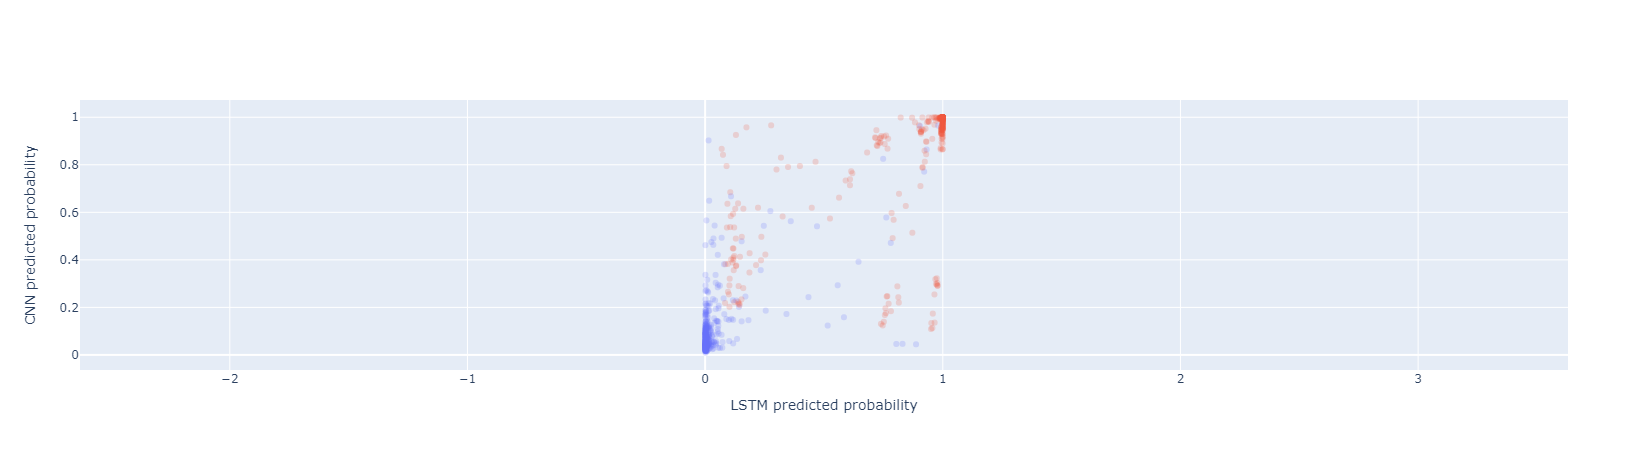

In [112]:
split = 'test'
df_fig = dfs['LSTM'][split].copy()
df_fig = df_fig.rename(columns={'prob': 'LSTM prob'})
df_fig['label'] = df_fig['label'].astype(bool)
df_fig['CNN prob'] = dfs['CNN'][split]['prob']
# df_fig = pd.concat([
#     dfs['LSTM']['test']['prob'].rename('LSTM prob'),
#     dfs['CNN']['test']['prob'].rename('CNN prob'),
#     dfs['LSTM']['test']['label'].astype(bool),
#     dfs['LSTM']['test']['prefix'],
#     dfs['LSTM']['test']['arpnum'],
#     dfs['LSTM']['test']['t_start'],
#     dfs['LSTM']['test']['t_end'],
#     dfs['LSTM']['test']['bad_img_idx'],
#     dfs['LSTM']['test']['flares'],
#     dfs['LSTM']['test']['USFLUXL'],
#     dfs['LSTM']['test']['MEANGBL'],
#     dfs['LSTM']['test']['R_VALUE'],
#     dfs['LSTM']['test']['AREA'],
# ],
#     axis=1
# )


colors = [px.colors.qualitative.Plotly[i] for i in df_fig['label']]
data = go.Scatter(x=df_fig['LSTM prob'], y=df_fig['CNN prob'],
                  mode="markers",
                  marker=dict(color=colors),
                  #line=dict(width=0),
                  customdata=df_fig[['prefix', 'arpnum', 't_end', 'AREA']].to_numpy(),
                  hovertemplate=(
                      "<b>x=%{x}, y=%{y} </b><br><br>" +
                      "%{customdata[0]} %{customdata[1]}<br>" +
                      "time: %{customdata[2]}<br>" +
                      "AREA: %{customdata[3]}"
                  )
)
fig = go.Figure(data=data)
fig.update_layout(
    xaxis_title='LSTM predicted probability',
    yaxis_title='CNN predicted probability',
    yaxis = dict(scaleanchor = 'x')
)
fig

* test set is a random permutation. val = test. Then we have the entire dataset. But what it's for? We can have more samples to support our findings. But what is our finding?
* This only shows that LSTM score is highly correlated with AREA and related quantities, which is expected.
* By looking at samples on which CNN got right and LSTM got wrong, we 

In [98]:
((df_fig['CNN prob'] > 0.5) ^ df_fig['label']).mean(), \
((df_fig['LSTM prob'] > 0.5) ^ df_fig['label']).mean()

(0.011273957158962795, 0.05947012401352875)

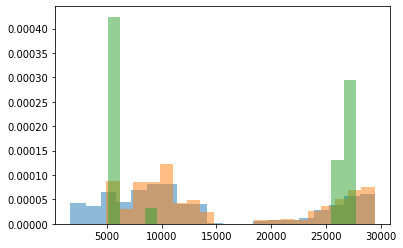

In [47]:
bins = 20
plt.hist(df_fig.loc[df_fig['label'].astype(bool),
                    'AREA'],
         alpha=0.5,
         bins=bins,
         density=True)
plt.hist(df_fig.loc[df_fig['label'].astype(bool) &
                    (df_fig['LSTM prob'] > 0.5),
                    'AREA'],
         alpha=0.5,
         bins=bins,
         density=True)
plt.hist(df_fig.loc[df_fig['label'].astype(bool) &
                    (df_fig['LSTM prob'] > 0.5) &
                    (df_fig['CNN prob'] < 0.5),
                    'AREA'],
         alpha=0.5,
         bins=bins,
         density=True)
plt.show()

In [119]:
def func(row):
    if not row['label']:
        return 'True Negative'
    elif not row['LSTM prob'] > 0.5:
        return 'LSTM FN'
    elif not row['CNN prob'] > 0.5:
        return 'LSTM TP & CNN FN'
    else:
        return 'LSTM TP & CNN TP'
df_fig['component'] = df_fig.apply(func, axis=1)

In [105]:
df_fig

,prefix,arpnum,t_start,t_end,label,flares,bad_img_idx,FLARE_INDEX,AREA,USFLUXL,MEANGBL,R_VALUE,LSTM prob,pred,CNN prob,component
0,HARP,241,2010-11-01 19:12:00,2010-11-02 19:12:00,False,,[],0.0,3619.505615,6.558875e+21,18.891,2.462086,0.030072,0,0.061031,True Negative
1,HARP,241,2010-11-05 00:00:00,2010-11-06 00:00:00,False,,[],0.0,3965.237305,6.179868e+21,20.317,-0.094560,0.001598,0,0.106737,True Negative
2,HARP,256,2010-11-20 11:12:00,2010-11-21 11:12:00,False,,[],0.0,2382.630371,3.895944e+21,17.924,2.666118,0.034229,0,0.089933,True Negative
3,HARP,256,2010-11-21 19:12:00,2010-11-22 19:12:00,False,,[],0.0,1544.822632,2.303796e+21,15.511,1.799190,0.010130,0,0.077938,True Negative
4,HARP,259,2010-11-18 12:48:00,2010-11-19 12:48:00,False,,[],0.0,5111.273438,9.107400e+21,19.538,2.651960,0.080213,0,0.079424,True Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3543,HARP,7452,2020-10-14 20:48:00,2020-10-15 20:48:00,False,,[],0.0,599.105469,8.063883e+20,14.578,-0.094560,0.001731,0,0.075312,True Negative
3544,HARP,7454,2020-10-15 20:48:00,2020-10-16 20:48:00,False,,[-2],0.0,2756.143799,5.442610e+21,18.417,1.926606,0.018194,0,0.077868,True Negative
3545,HARP,7454,2020-10-20 14:24:00,2020-10-21 14:24:00,False,,[-13],0.0,3688.301025,5.882061e+21,19.868,2.705258,0.060585,0,0.075653,True Negative
3546,HARP,7454,2020-10-22 08:00:00,2020-10-23 08:00:00,False,,[],0.0,3314.592529,5.120695e+21,15.842,2.956759,0.051320,0,0.297929,True Negative


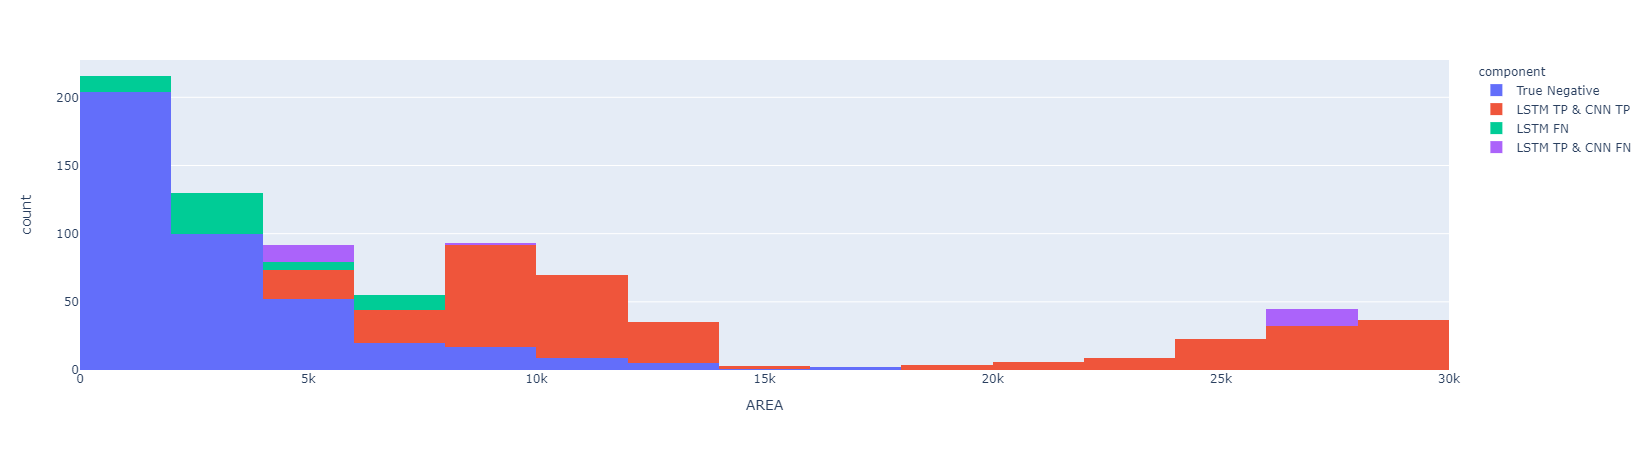

In [121]:
px.histogram(df_fig, #[df_fig['label'] & (df_fig['LSTM prob'] > 0.5)],
             x='AREA',
             color='component'
)

array([[<AxesSubplot:title={'center':'arpnum'}>,
        <AxesSubplot:title={'center':'label'}>,
        <AxesSubplot:title={'center':'FLARE_INDEX'}>],
       [<AxesSubplot:title={'center':'AREA'}>,
        <AxesSubplot:title={'center':'USFLUXL'}>,
        <AxesSubplot:title={'center':'MEANGBL'}>],
       [<AxesSubplot:title={'center':'R_VALUE'}>,
        <AxesSubplot:title={'center':'prob'}>,
        <AxesSubplot:title={'center':'pred'}>]], dtype=object)

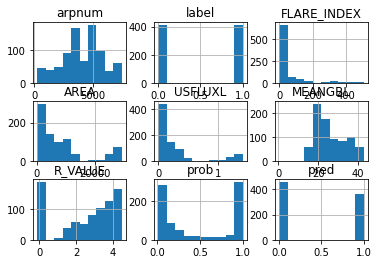

In [123]:
dfs['CNN']['test'].hist()

In [59]:
df_fig

,LSTM prob,CNN prob,label,prefix,arpnum,t_start,AREA,component
0,0.006784,0.077448,False,HARP,248,2010-11-08 08:00:00,1303.464600,True Negative
1,0.012698,0.094177,False,HARP,248,2010-11-09 03:12:00,1049.850220,True Negative
2,0.015559,0.084795,False,HARP,248,2010-11-09 04:48:00,1025.983032,True Negative
3,0.022414,0.101991,False,HARP,248,2010-11-09 09:36:00,1019.582520,True Negative
4,0.001242,0.017359,False,HARP,270,2010-12-01 06:24:00,924.489197,True Negative
...,...,...,...,...,...,...,...,...
815,0.045480,0.057865,False,HARP,7431,2020-07-25 17:36:00,2203.542969,True Negative
816,0.036016,0.053899,False,HARP,7431,2020-07-25 22:24:00,2218.432129,True Negative
817,0.006904,0.048182,False,HARP,7466,2020-11-09 06:24:00,996.409607,True Negative
818,0.001890,0.075721,False,HARP,7470,2020-11-19 22:24:00,2498.276123,True Negative


In [73]:
dset = ActiveRegionDataset(df_fig, ['MAGNETOGRAM'], num_frames=1)

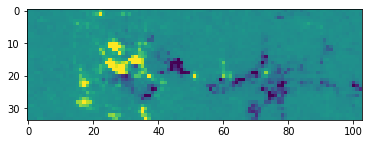

In [78]:
for i plt.imshow(dset[1][0][0,0], vmin=-300, vmax=300)

In [79]:
dset[1]

(tensor([[[[ -1.2998,  -1.0000,  -7.0000,  ...,   4.6016,   4.6992,   0.0000],
           [  1.0996,   3.0996,  -0.3000,  ...,  -6.3008,   3.0000, -11.7969],
           [  3.0000,   1.2998,   3.9004,  ...,   0.5000,   1.5000,   0.7002],
           ...,
           [  1.0000,   6.3008,   2.5996,  ...,  -7.8008,  -4.1992,  -5.8008],
           [ -5.6016,  -1.5000,   4.8008,  ...,   1.0996,  -9.3984,   2.0996],
           [ -5.6992,  -1.2002,  -9.7969,  ...,   9.6016,  -0.2000,  -4.0000]]]]),
 tensor([-1.1579, -0.6923]),
 0,
 'HARP000248_20101110031200_H0_W0_.npy')

In [ ]:
%matplotlib inline
dataset = 'sharp'
seed = 0
estimator = 'CNN'
gradcam_layer = 'convs.conv4'

learner = get_learner(dataset, seed, estimator) # only to get cfg
transform = get_transform_from_learner(learner)
dset = ActiveRegionDataset(df_fn, features=['MAGNETOGRAM'], num_frames=1, transform=transform)

gradcam = utils.GradCAM(learner.model,
                        target_layers=[gradcam_layer], data_mean=0, data_std=1)
for i, (video, size, y, m) in tqdm(enumerate(dset)):
    for label in [0, 1]:

    m = m.replace('.npy', '')
    vg, vs, hm, out = gradcam(video.to('cuda:0').unsqueeze(0),
                              torch.tensor([label], device='cuda:0'))
    f = lambda ncthw: ncthw[0,:,0,:,:].permute(1,2,0).detach().cpu().numpy()
    plt.figure(); plt.imshow(f(hm)); plt.colorbar(); plt.savefig(f'output_{gradcam_layer}/{i:02d}_{dataset}_{label}.png'); plt.close()

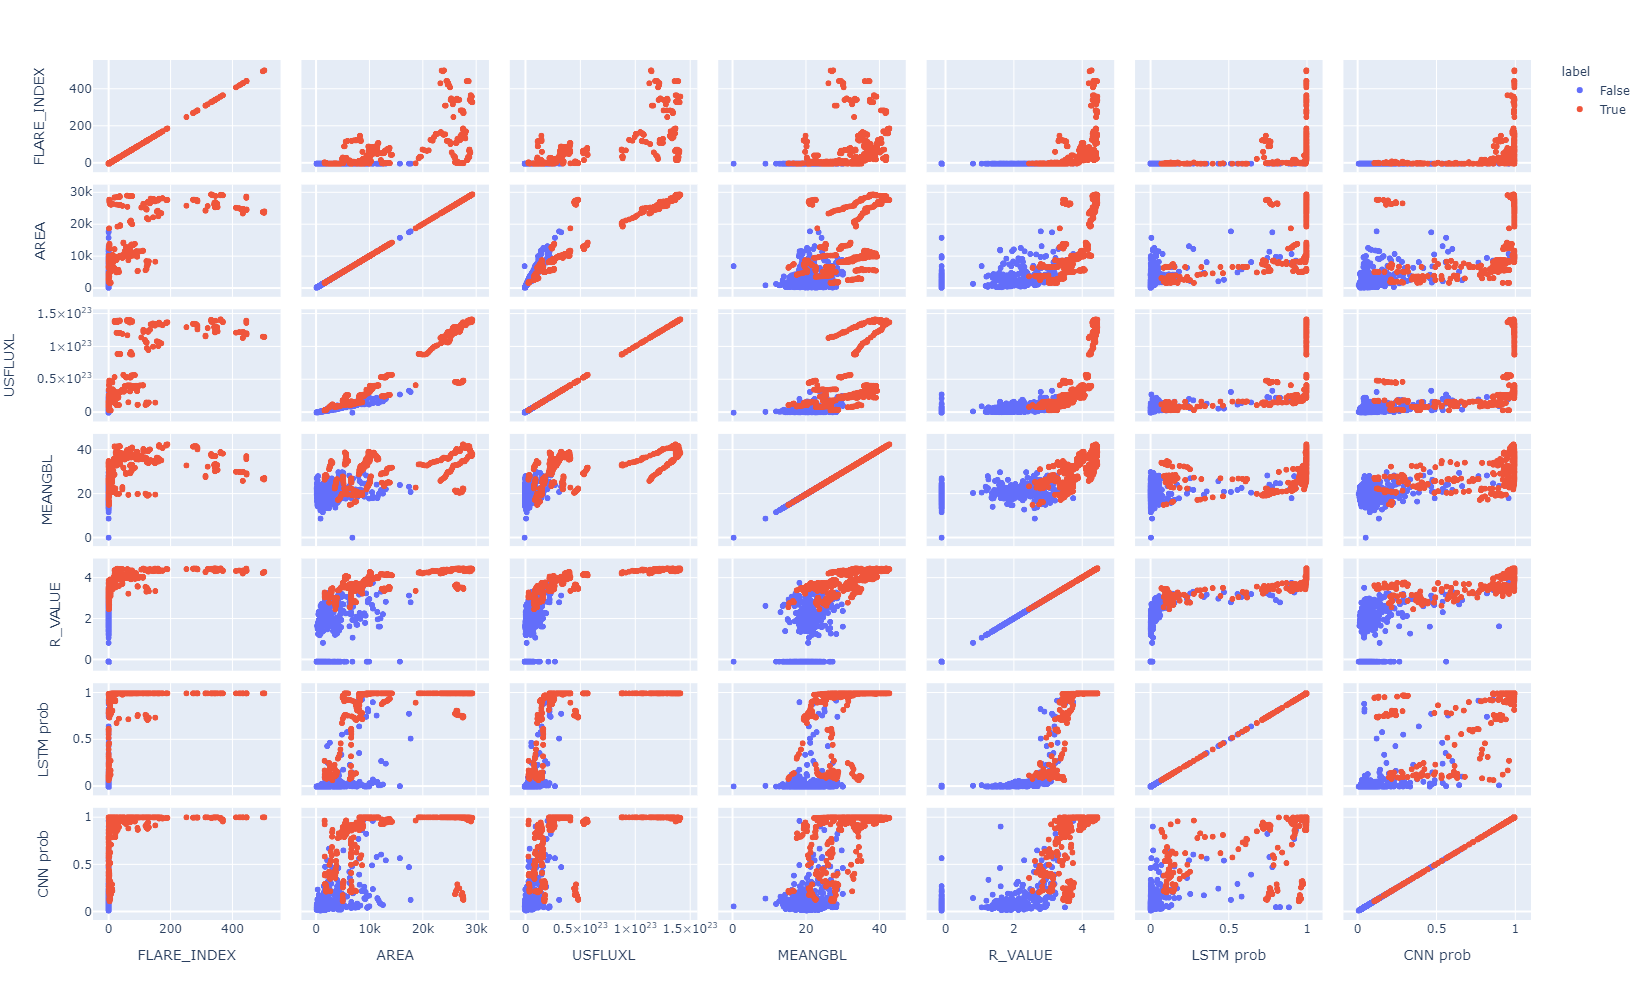

In [131]:
px.scatter_matrix(df_fig,
                  dimensions=['FLARE_INDEX', 'AREA', 'USFLUXL', 'MEANGBL', 'R_VALUE', 'LSTM prob', 'CNN prob'],
                  height=1000,
                  hover
                  color='label')

/home/zeyusun/.conda/envs/arnet/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



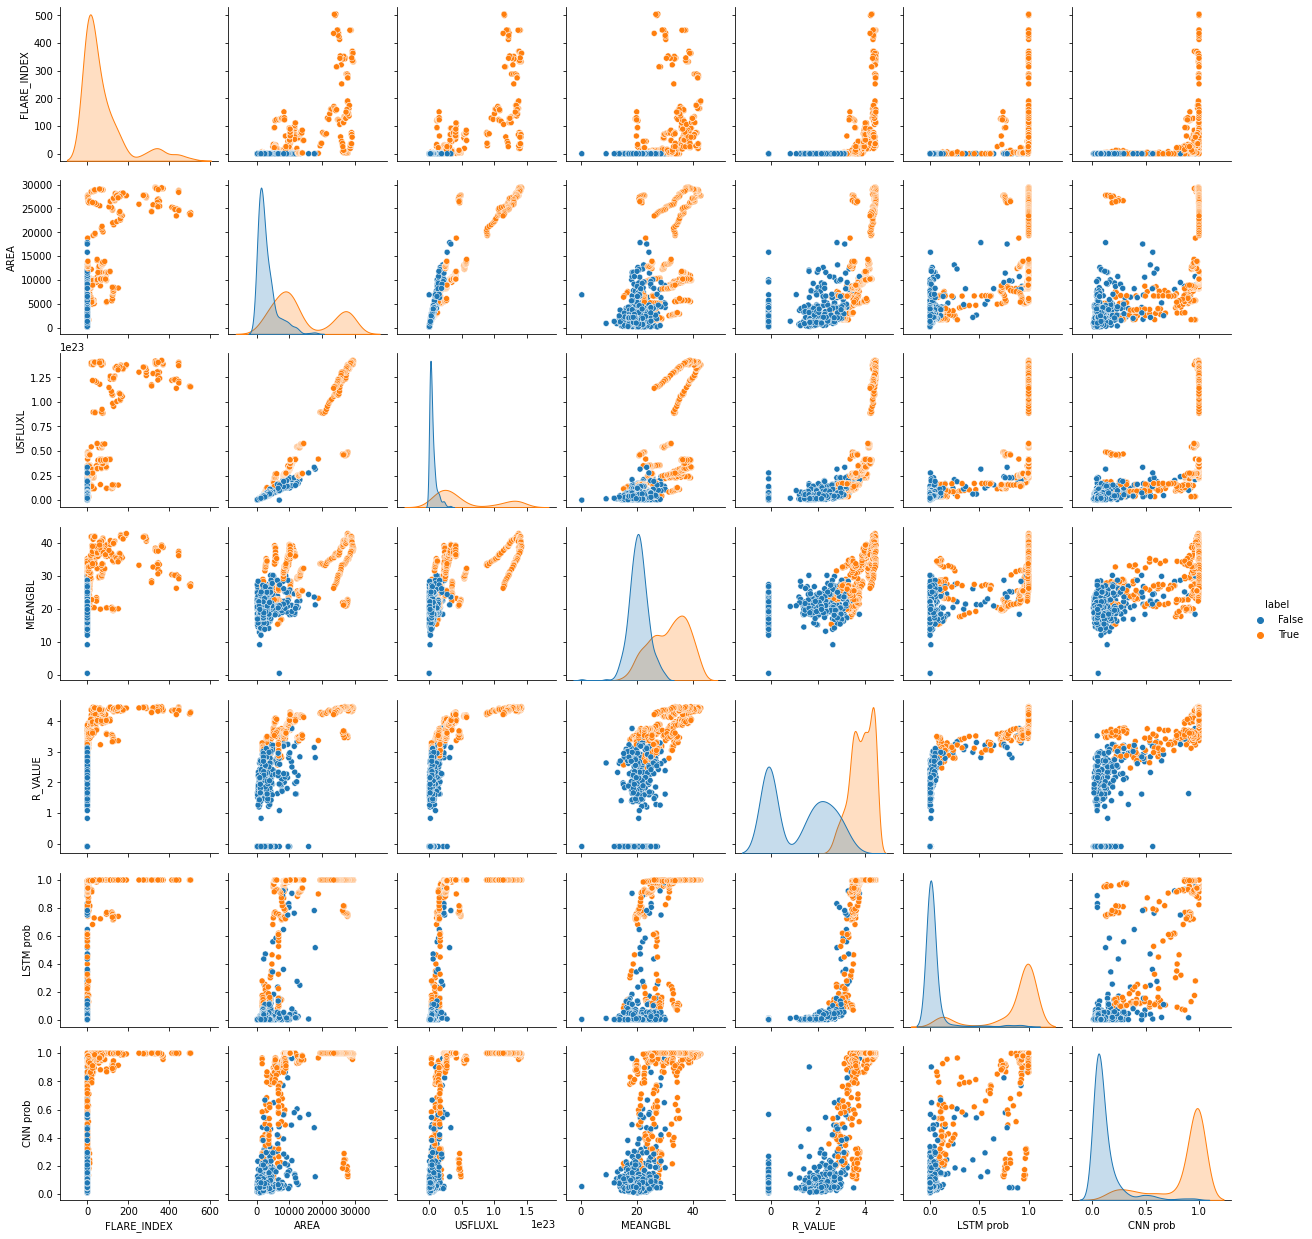

In [127]:
sns.pairplot(df_fig[['FLARE_INDEX', 'AREA', 'USFLUXL', 'MEANGBL', 'R_VALUE', 'LSTM prob', 'CNN prob', 'label']],
             hue='label')

In [ ]:
draw_gradcam(learner, df_fig)
# draws plots for df. Each row is one sample, containing original image, image overlaid with heatmap, gradcam for class 0 and 1 for different layers.
def draw_gradcam(learner, df):
    """
    df: prefix, arpnum, t_end
    """
    target_layers = ['convs.conv5', 'convs.conv4']
    transform = get_transform_from_learner(learner)
    dset = ActiveRegionDataset(df, features=['MAGNETOGRAM'], num_frames=1, transform=transform)

    gradcam = utils.GradCAM(learner.model,
                            target_layers=[gradcam_layer], data_mean=0, data_std=1)
    for i, (video, size, y, m) in tqdm(enumerate(dset)):
        for gradcam_layer in target_layers:
        for label in [0, 1]:

        m = m.replace('.npy', '')
        vg, vs, hm, out = gradcam(video.to('cuda:0').unsqueeze(0),
                                  torch.tensor([label], device='cuda:0'))
        f = lambda ncthw: ncthw[0,:,0,:,:].permute(1,2,0).detach().cpu().numpy()
        plt.figure(); plt.imshow(f(hm)); plt.colorbar();